# Começando a pensar no projeto

BRAIN STORM

- recusar mais crédito

- Elassificar estado dos produtos, identificar se é melhor FP ou FN, 

- Objetivo é discriminar quais são os produtos sem falhas e com falhas (Classificação - supervisionado)


## Contextualização

A PyCoders Ltda., cada vez mais especializada no mundo da Inteligência Artificial e Ciência de Dados, foi procurada por uma fintech para desenvolver um projeto de teste de produtos. Nesse projeto, espera-se a criação de valor que **discrimine ao máximo** os **produtos com falhas** dos **produto sem falhas**. 

Para cada product_code, você recebe vários atributos de produto (fixados para o código), bem como vários valores de medição para cada produto individual, representando vários métodos de teste de laboratório. Cada produto é usado em um experimento simulado de ambiente do mundo real e absorve uma certa quantidade de fluido (carregamento) para ver se falha ou não.

Sua tarefa é usar os dados para prever falhas de novos códigos de produtos individuais com seus resultados de testes de laboratório individuais.

Para isso, foi disponibilizada uma base de dados com milhares de casos de **testes do passado** com diversas características dos produtos. 

Entrega: um modelo com a **melhor performance** possível.

Métrica de performance (inicialmente proposta): **ROC-AUC** (mas isso é flexível, conforme detalhado mais abaixo!)

## Base de Dados

Serão utilizadas bases de dados com **informações de diversos produtos**. 

O conjunto de dados está dividido em **treino e teste**, todos no formato csv. 

Toda a modelagem, validação e avaliação deve ser feita em cima do conjunto de **treino**, que contém o target (arquivo: `train_data.csv`)

# Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Avaliar o modelo

In [2]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report,
    roc_auc_score,
)


def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)
    y_probs_train = estimator.predict_proba(X_train)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    disp = RocCurveDisplay.from_predictions(y_train, y_probs_train)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_train, y_probs_train):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)
    y_probs_test = estimator.predict_proba(X_test)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

    disp = RocCurveDisplay.from_predictions(y_test, y_probs_test)
    disp.ax_.set_title(f"AUC: {roc_auc_score(y_test, y_probs_test):.3f}", fontsize=16)
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, ls=":", color="black")
    plt.show()


## INICIANDO O PROJETO

In [3]:
descricao = pd.read_csv('train_data.csv')
descricao.shape

(21256, 27)

In [4]:
descricao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21256 entries, 0 to 21255
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21256 non-null  int64  
 1   id              21256 non-null  int64  
 2   product_code    21256 non-null  object 
 3   loading         21063 non-null  float64
 4   attribute_0     21256 non-null  object 
 5   attribute_1     21256 non-null  object 
 6   attribute_2     21256 non-null  int64  
 7   attribute_3     21256 non-null  int64  
 8   measurement_0   21256 non-null  int64  
 9   measurement_1   21256 non-null  int64  
 10  measurement_2   21256 non-null  int64  
 11  measurement_3   20968 non-null  float64
 12  measurement_4   20832 non-null  float64
 13  measurement_5   20708 non-null  float64
 14  measurement_6   20626 non-null  float64
 15  measurement_7   20491 non-null  float64
 16  measurement_8   20414 non-null  float64
 17  measurement_9   20267 non-null 

In [5]:
descricao.columns

Index(['Unnamed: 0', 'id', 'product_code', 'loading', 'attribute_0',
       'attribute_1', 'attribute_2', 'attribute_3', 'measurement_0',
       'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17', 'failure'],
      dtype='object')

In [6]:
descricao.product_code.value_counts()

C    4624
E    4242
B    4208
D    4109
A    4073
Name: product_code, dtype: int64

In [7]:
descricao[
    ['product_code', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3']
].value_counts()

product_code  attribute_0  attribute_1  attribute_2  attribute_3
C             material_7   material_8   5            8              4624
E             material_7   material_6   6            9              4242
B             material_5   material_5   8            8              4208
D             material_7   material_5   6            6              4109
A             material_7   material_8   9            5              4073
dtype: int64

In [8]:
descricao['failure'].value_counts(normalize=True)

0    0.787401
1    0.212599
Name: failure, dtype: float64

In [9]:
descricao.isna().sum().sort_values(ascending=False)

measurement_17    1828
measurement_16    1714
measurement_15    1591
measurement_14    1504
measurement_13    1431
measurement_12    1270
measurement_11    1200
measurement_10    1048
measurement_9      989
measurement_8      842
measurement_7      765
measurement_6      630
measurement_5      548
measurement_4      424
measurement_3      288
loading            193
Unnamed: 0           0
id                   0
measurement_2        0
measurement_1        0
measurement_0        0
attribute_3          0
attribute_2          0
attribute_1          0
attribute_0          0
product_code         0
failure              0
dtype: int64

# ANÁLISE E EXPLORAÇÃO DOS DADOS

In [10]:
# Análise inicial dos dados, como info, dados faltantes (para retirar), estudar as colunas, dados duplicados. SK_ID_CURR
# análises estatísticas, média, mediana, correlação,
# visualização dos dados
descricao.describe()

,Unnamed: 0,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,21256.000000,21256.000000,21063.000000,21256.000000,21256.000000,21256.000000,21256.000000,21256.000000,20968.000000,20832.000000,...,20267.000000,20208.000000,20056.000000,19986.000000,19825.000000,19752.000000,19665.000000,19542.000000,19428.000000,21256.000000
mean,13270.977042,13270.977042,127.903198,6.753246,7.238097,7.418047,8.222196,6.260303,17.793034,11.727584,...,11.435369,16.112582,19.174009,11.706258,15.651114,16.046656,14.993933,16.468174,701.753851,0.212599
std,7655.272601,7655.272601,39.174713,1.471965,1.454978,4.124430,4.212312,3.317758,1.001315,0.994918,...,1.001454,1.406117,1.525073,1.487670,1.153727,1.495215,1.548852,1.709557,123.443580,0.409156
min,0.000000,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,...,7.537000,9.323000,12.461000,5.181000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6668.750000,6668.750000,100.110000,6.000000,6.000000,4.000000,5.000000,4.000000,17.118000,11.050000,...,10.761000,15.205000,18.166000,10.714000,14.891000,15.049000,13.950000,15.276000,619.493250,0.000000
50%,13226.500000,13226.500000,122.310000,6.000000,8.000000,7.000000,8.000000,6.000000,17.786000,11.729500,...,11.433000,16.125000,19.222000,11.727000,15.624000,16.037500,14.966000,16.441000,701.695000,0.000000
75%,19895.250000,19895.250000,149.140000,8.000000,8.000000,10.000000,11.000000,8.000000,18.470250,12.405000,...,12.108000,17.018000,20.208250,12.712000,16.374000,17.085000,16.014000,17.630000,784.679250,0.000000
max,26568.000000,26568.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.336000,15.379000,...,15.412000,22.479000,25.640000,17.663000,22.713000,21.940000,21.626000,24.094000,1312.794000,1.000000


In [11]:
# Colunas com correlação maior que 10% piorou o roc_auc_score
# corr = descricao.corr().failure.abs()
# cols_corr = corr[corr >= 0.01].index.to_list()
# cols_corr

In [12]:
pd.DataFrame(descricao.corr().failure.abs()).failure.sort_values()


/tmp/ipykernel_34940/3488777659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(descricao.corr().failure.abs()).failure.sort_values()


measurement_10    0.000242
measurement_16    0.000551
measurement_13    0.000839
measurement_3     0.001669
measurement_12    0.002589
measurement_11    0.002805
id                0.002856
Unnamed: 0        0.002856
attribute_2       0.003678
measurement_15    0.003968
measurement_9     0.005390
measurement_1     0.010485
measurement_14    0.011033
measurement_4     0.012188
measurement_0     0.012569
measurement_2     0.013437
attribute_3       0.015961
measurement_6     0.016212
measurement_7     0.016590
measurement_8     0.017935
measurement_5     0.022367
measurement_17    0.034919
loading           0.131245
failure           1.000000
Name: failure, dtype: float64

In [13]:
def mean(df):
    measurements = [f"measurement_{i}" for i in range(18)]
    attributes = ["attribute_2", "attribute_3"]

    df["attribute_mean"] = df[attributes].mean(axis=1)
    df["measurement_mean"] = df[measurements].mean(axis=1)

    columns = attributes + measurements + ["Unnamed: 0", "id"]

    return df.drop(columns=columns)


In [14]:
def median(df):
    measurements = [f"measurement_{i}" for i in range(18)]
    attributes = ["attribute_2", "attribute_3"]

    df["attribute_median"] = df[attributes].median(axis=1)
    df["measurement_median"] = df[measurements].median(axis=1)

    columns = attributes + measurements + ["Unnamed: 0", "id"]

    return df.drop(columns=columns)


In [15]:
# Particinar os dados (split train e test) -> train e validation
from sklearn.model_selection import train_test_split

df_calc = mean(descricao.copy())
# df_calc = median(descricao.copy())

X_full = df_calc.drop(columns="failure")
y_full = df_calc.failure

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)


In [16]:
X_full

,product_code,loading,attribute_0,attribute_1,attribute_mean,measurement_mean
0,A,94.34,material_7,material_8,7.0,59.425471
1,E,117.02,material_7,material_6,7.5,55.541882
2,B,256.42,material_5,material_5,8.0,52.067706
3,D,87.76,material_7,material_5,6.0,43.269889
4,C,97.84,material_7,material_8,6.5,44.765176
...,...,...,...,...,...,...
21251,D,181.27,material_7,material_5,6.0,55.377059
21252,E,131.92,material_7,material_6,7.5,61.408667
21253,C,199.92,material_7,material_8,6.5,66.753882
21254,B,129.26,material_5,material_5,8.0,56.125118


# Preprocessamento de dados -> FEATURE ENGINEERING

In [17]:
# Preencher dados faltantes, transformar colunas categóricas em numéricas (ou dummies), retirar colunas com mais de n% dos dados faltantes
# Extração de dados, seleção de dados, balanceamento de classe!

# Criar novas colunas, por exemplo taxa (quantidade de pagamento)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical = X_full.select_dtypes(include="number").columns.to_list()
pipe_numerical = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical = X_full.select_dtypes(exclude="number").columns.to_list()
pipe_categorical = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant")),
        ("ohe", OneHotEncoder(drop="first")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical", pipe_numerical, numerical),
        ("categorical", pipe_categorical, categorical),
    ],
)
preprocessor


ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['loading', 'attribute_mean',
                                  'measurement_mean']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['product_code', 'attribute_0',
                                  'attribute_1'])])

## PIPELINE

- remover tais colunas
- criar outras colunas
- imputer mean nas colunas numéricas
- encoding nas categóricas
- scaler

- balanceamento de classe

In [18]:
from imblearn import pipeline
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import FunctionTransformer

pipe = pipeline.Pipeline(
    [
        ("preprocessor", preprocessor),
        ("balancer", SMOTETomek(random_state=42)),
        ("select_best", SelectKBest()),
        ("rf", RandomForestClassifier()),
        # ("knn", KNeighborsClassifier()),
        # ("lr", LogisticRegression()),
    ]
)
pipe


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loading', 'attribute_mean',
                                                   'measurement_mean']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['product_code',
                                                   'attribute_0',
                                                   'attribute_1'])])),
                ('balancer', SMOTETomek(random_state=42)),
                ('select_best', SelectKBest()),
                ('rf', RandomForestClassifier())])

In [19]:
from skopt import BayesSearchCV
from skopt.space import Categorical
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
score = make_scorer(f1_score)

params_rf = {
    "rf__n_estimators": (50, 500, "uniform"),
    "rf__criterion": Categorical(["gini", "entropy", "log_loss"]),
    "rf__max_depth": (5, 13, "uniform"),
}

params_knn = {
    "knn__n_neighbors": (3, 10, "uniform"),
    "knn__weights": Categorical(["uniform", "distance"]),
    "knn__algorithm": Categorical(["auto", "ball_tree", "kd_tree", "brute"]),
}

params_lr = {
    "lr__penalty": Categorical(["l1", "l2", "elasticnet", "none"]),
    "lr__tol": (1e-4, 1e+4, "log-uniform"),
    "lr__max_iter": (100, 10_000, "uniform"),
    "lr__solver": Categorical(["saga"]),
}

bayes = BayesSearchCV(
    estimator=pipe,
    search_spaces=params_rf,
    # search_spaces=params_knn,
    # search_spaces=params_lr,
    # n_iter=50,
    n_iter=10,
    scoring=score,
    cv=splitter,
    random_state=42,
    n_jobs=-1,
)
bayes


BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('numerical',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer()),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['loading',
                                                                           'attribute_mean',
                                                                           'measurement_mean']),
                                                                         ('categorical',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy=...
                                                                           'attribute_1'])])),
                                        ('balancer',
                                         SMOTETomek(random_state=42)),
                                        ('select_best', SelectKBest()),
                                        ('rf', RandomForestClassifier())]),
              n_iter=10, n_jobs=-1, random_state=42,
              scoring=make_scorer(f1_score),
              search_spaces={'rf__criterion': Categorical(categories=('gini', 'entropy', 'log_loss'), prior=None),
                             'rf__max_depth': (5, 13, 'uniform'),
                             'rf__n_estimators': (50, 500, 'uniform')})

In [20]:
# bayes.fit(X_train, y_train)
bayes.fit(X_full, y_full)

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('numerical',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer()),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['loading',
                                                                           'attribute_mean',
                                                                           'measurement_mean']),
                                                                         ('categorical',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy=...
                                                                           'attribute_1'])])),
                                        ('balancer',
                                         SMOTETomek(random_state=42)),
                                        ('select_best', SelectKBest()),
                                        ('rf', RandomForestClassifier())]),
              n_iter=10, n_jobs=-1, random_state=42,
              scoring=make_scorer(f1_score),
              search_spaces={'rf__criterion': Categorical(categories=('gini', 'entropy', 'log_loss'), prior=None),
                             'rf__max_depth': (5, 13, 'uniform'),
                             'rf__n_estimators': (50, 500, 'uniform')})

In [21]:
bayes.best_params_

OrderedDict([('rf__criterion', 'log_loss'),
             ('rf__max_depth', 6),
             ('rf__n_estimators', 319)])

## Treino e Teste


Métricas de avaliação de treino:


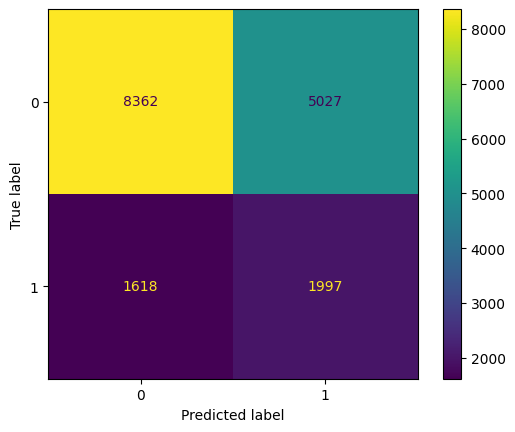

              precision    recall  f1-score   support

           0       0.84      0.62      0.72     13389
           1       0.28      0.55      0.38      3615

    accuracy                           0.61     17004
   macro avg       0.56      0.59      0.55     17004
weighted avg       0.72      0.61      0.64     17004



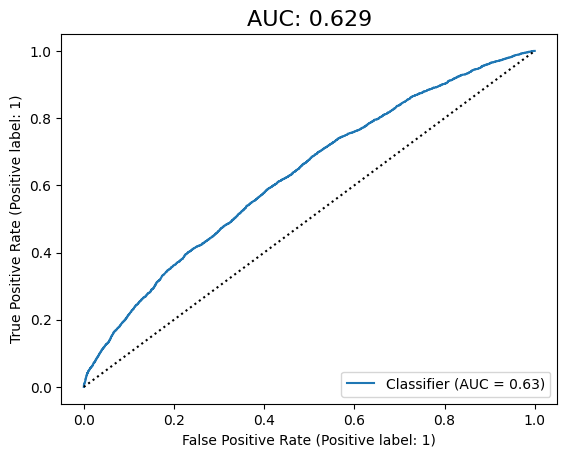


Métricas de avaliação de teste:


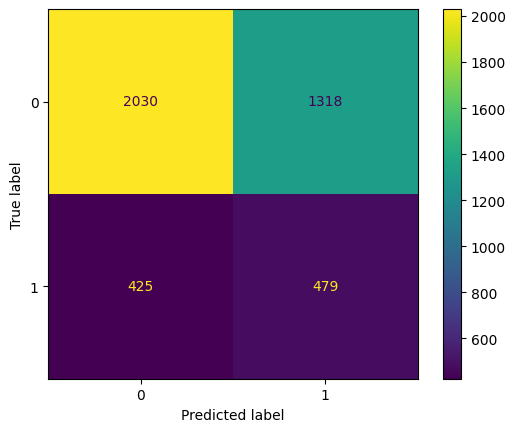

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      3348
           1       0.27      0.53      0.35       904

    accuracy                           0.59      4252
   macro avg       0.55      0.57      0.53      4252
weighted avg       0.71      0.59      0.63      4252



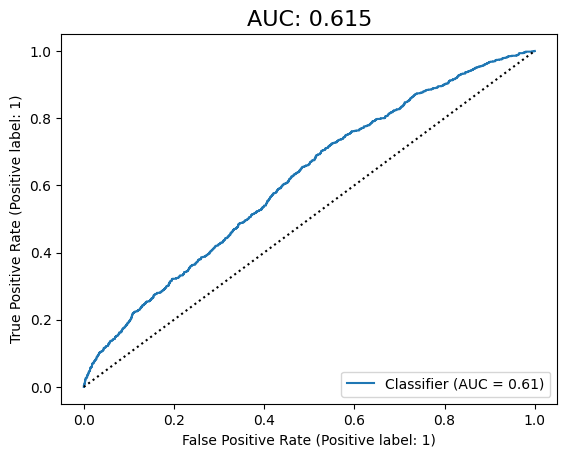

In [22]:
metricas_classificacao(bayes, X_train, X_test, y_train, y_test)

# Verificando Resultado do Modelo

In [23]:
df_valid = pd.read_csv("test_data.csv")
df_valid.shape


(5314, 27)

## Features e Alvo

In [24]:
df_valid_mean = mean(df_valid.copy())
# df_valid_mean = median(df_valid.copy())
# O Resultado usando a mediana ficou um pouco pior
# roc_auc_train=0.621
# roc_auc_test=0.574

X_valid = df_valid_mean.drop(columns="failure")
y_valid = df_valid_mean.failure

## Métricas de Classificação


Métricas de avaliação de treino:


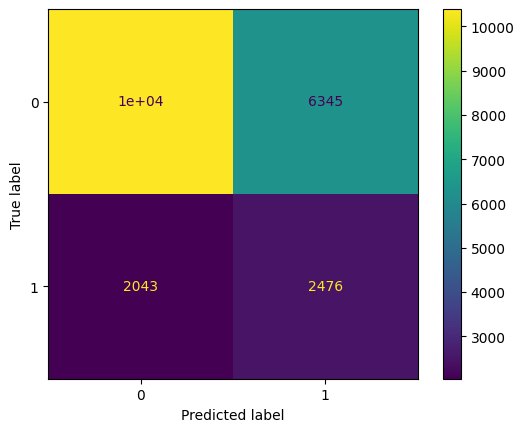

              precision    recall  f1-score   support

           0       0.84      0.62      0.71     16737
           1       0.28      0.55      0.37      4519

    accuracy                           0.61     21256
   macro avg       0.56      0.58      0.54     21256
weighted avg       0.72      0.61      0.64     21256



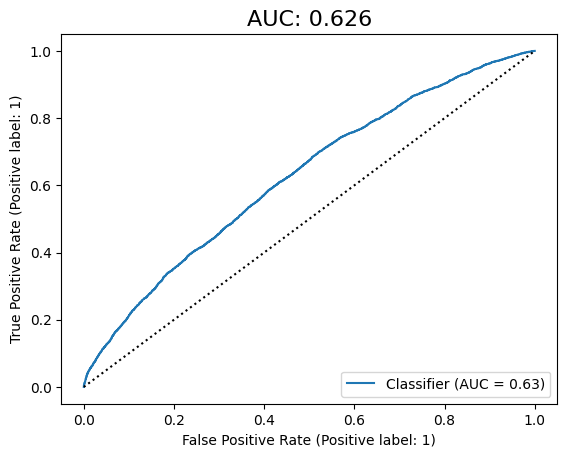


Métricas de avaliação de teste:


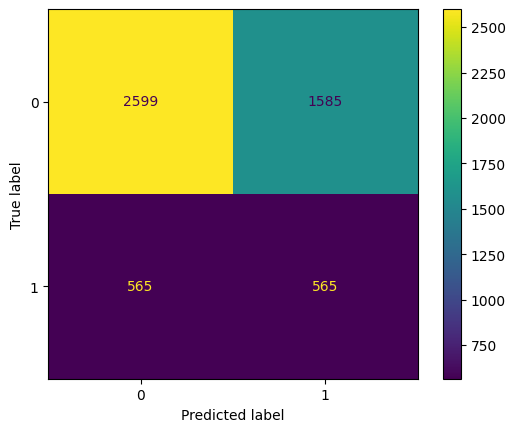

              precision    recall  f1-score   support

           0       0.82      0.62      0.71      4184
           1       0.26      0.50      0.34      1130

    accuracy                           0.60      5314
   macro avg       0.54      0.56      0.53      5314
weighted avg       0.70      0.60      0.63      5314



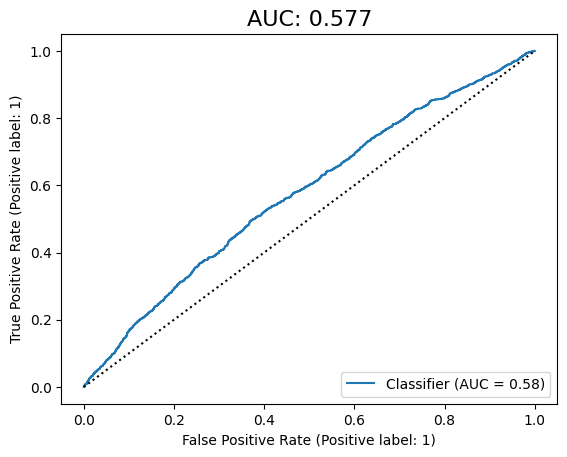

In [25]:
metricas_classificacao(bayes, X_full, X_valid, y_full, y_valid)